# Block 41: Workshop
## Wildlife Photo Augmentation with Multiple Images

### Problem Statement: 

You are tasked with building a Convolutional Neural Network (CNN) to classify images of animals into four categories: Squirrel, Elephant, Kangaroo, and Lion. You need to create a model that can accurately classify these animals based on the input images. 

### Overview: 

You have a set of images for each of the four animal categories. The images have varying dimensions, so you need to preprocess and standardize them. To improve the model's performance, you'll apply data augmentation techniques to increase the diversity of your training dataset. 

After building and training the CNN model, you'll visualize its training history to evaluate its performance. Finally, you'll demonstrate how to use the trained model to make predictions on new images. 


In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
# Image file paths
image_files = {
    "Squirrel": "Squirrel-header.jpg",
    "Elephant": "elephant.jpg",
    "Kangaroo": "Kangaroo.jpg",
    "Lion": "Lion.jpg"
}

1. Load the images into a dictionary.

In [3]:
# Loop through the dictionary and display each image
Images = {}

for label, image_path in image_files.items():
    Images[label] = Image.open(image_path)
Images

{'Squirrel': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x450>,
 'Elephant': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=238x212>,
 'Kangaroo': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1500x1000>,
 'Lion': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x527>}

2. Display the loaded images.

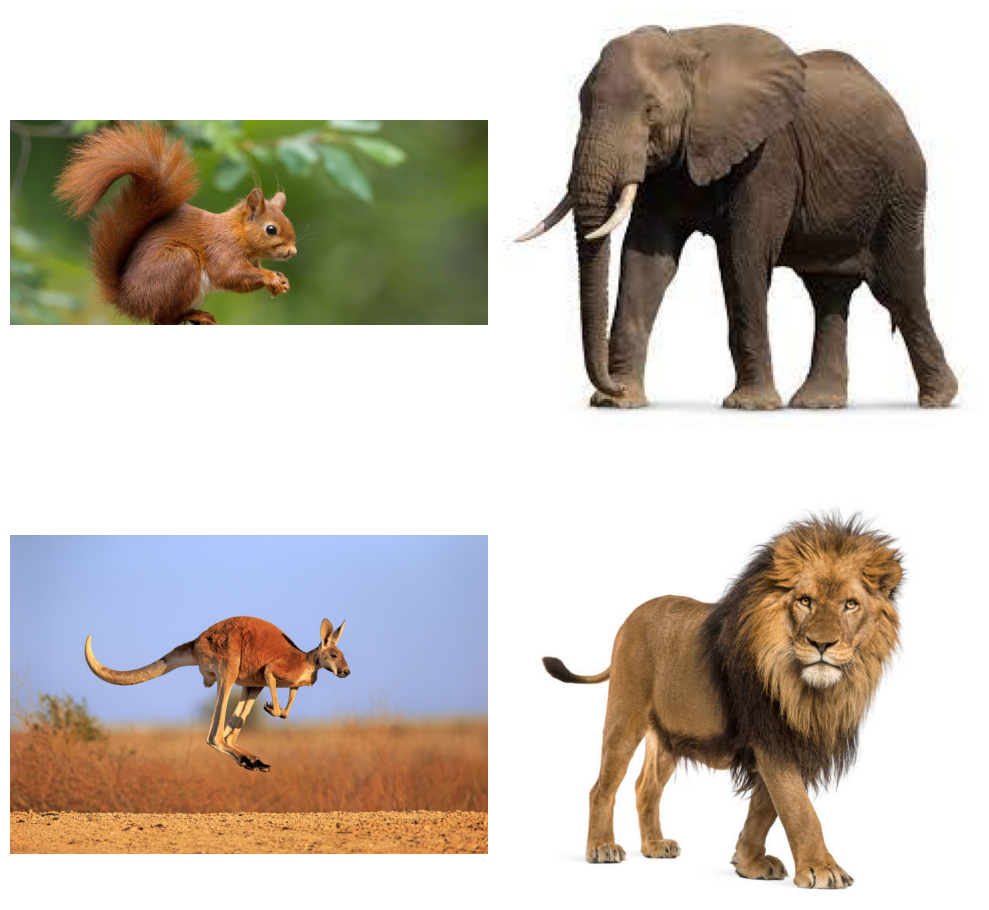

In [4]:
image1 = Images['Squirrel']
image2 = Images['Elephant']
image3 = Images['Kangaroo']
image4 = Images['Lion']

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the images in each subplot
axes[0, 0].imshow(image1)
axes[0, 0].axis('off')  # Hide the axis

axes[0, 1].imshow(image2)
axes[0, 1].axis('off')

axes[1, 0].imshow(image3)
axes[1, 0].axis('off')

axes[1, 1].imshow(image4)
axes[1, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot with the images
plt.show()

3. Define a function <code>augment_data </code> that performs data augmentation on the input data (<code>X</code> and <code>y</code>). </br>
    - Apply the following augmentation techniques: </br>
        - Rotation by 20 degrees. </br>
        - Horizontal shift of 20% of the image width. </br>
        - Vertical shift of 20% of the image height. </br>
        - Horizontal flip. </br>
        - Use <code>ImageDataGenerator</code> from TensorFlow. </br>

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data(X, y, batch_size=4):
    # Suppose X is image data and y is the corresponding labels
    # Create an ImageDataGenerator object with the desired augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,  # Rotate images by 20 degrees
        width_shift_range=0.2,  # Horizontal shift by 20% of the image width
        height_shift_range=0.2,  # Vertical shift by 20% of the image height
        horizontal_flip=True  # Perform horizontal flip
    )
    
    # Apply the augmentations to the input data (X and y)
    augmented_data = datagen.flow(X, y, batch_size=batch_size)

    return augmented_data   


4. Assign labels to the images.

In [6]:
###
### YOUR CODE HERE
###
animal_to_label = {
    'Squirrel': 0,
    'Elephant': 1,
    'Kangaroo': 2,
    'Lion': 3
}

10. Ensure all images have the same dimensions (resizing to the smallest image dimensions).

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


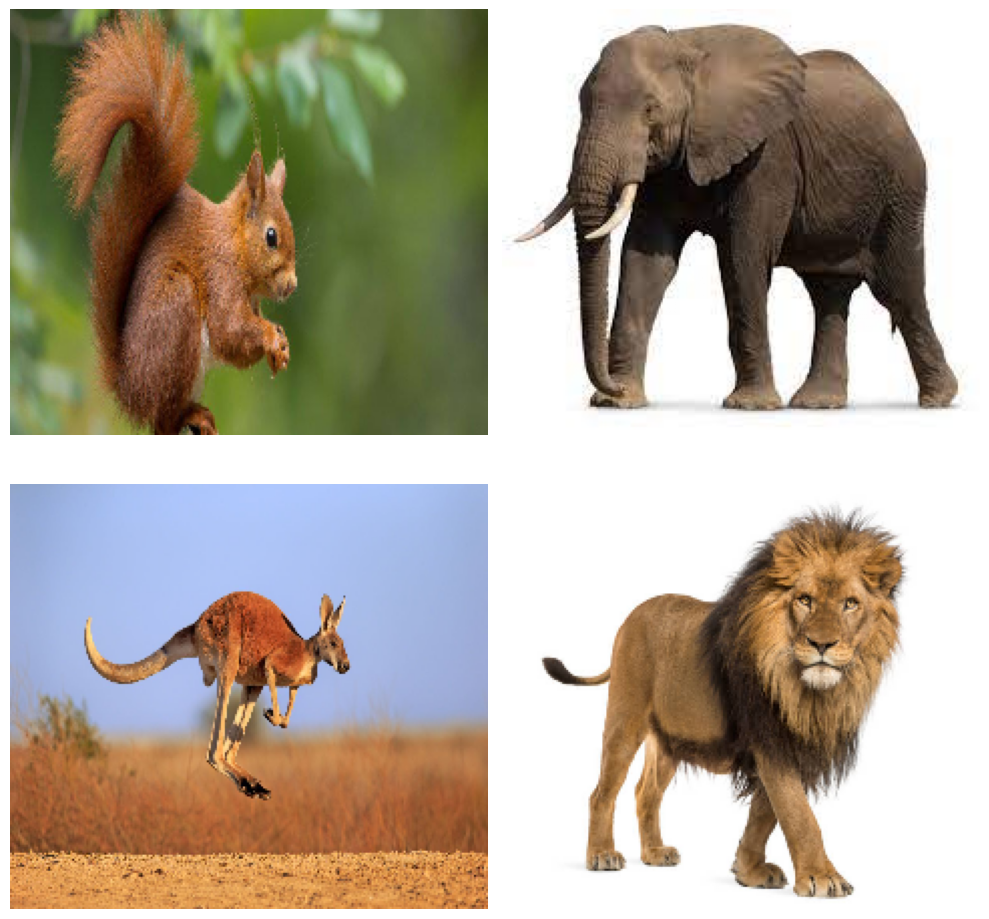

In [7]:
def preprocess_images_from_dict(image_dict):
    # Step 1: Convert images to numpy arrays
    image_arrays = {key: tf.keras.preprocessing.image.img_to_array(img) for key, img in image_dict.items()}
    
    # Step 2: Find the dimensions of the smallest image
    min_height = min(img.shape[0] for img in image_arrays.values())
    min_width = min(img.shape[1] for img in image_arrays.values())
    
    # Step 3: Resize all images to the smallest dimensions
    resized_images = {key: tf.image.resize(img, (min_height, min_width)).numpy() for key, img in image_arrays.items()}
    
    #Step 4: Normalize the image data (divide by 255.0)
    normalized_images = {key: img / 255.0 for key, img in resized_images.items()}
    
    return normalized_images

Images = preprocess_images_from_dict(Images)

image1 = Images['Squirrel']
image2 = Images['Elephant']
image3 = Images['Kangaroo']
image4 = Images['Lion']

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the images in each subplot
axes[0, 0].imshow(image1)
axes[0, 0].axis('off')  # Hide the axis

axes[0, 1].imshow(image2)
axes[0, 1].axis('off')

axes[1, 0].imshow(image3)
axes[1, 0].axis('off')

axes[1, 1].imshow(image4)
axes[1, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot with the images
plt.show()

11. Augment the data.

In [8]:
# Convert dict values and keys to lists
image_list = list(Images.values())
label_list = list(Images.keys())
# Convert image_list (list of images) to a NumPy array
image_array = np.array(image_list)
# Convert label_list (list of labels) to a NumPy array
label_array = np.array(label_list)


In [9]:
image_array

array([[[[0.29355073, 0.331613  , 0.24095559],
         [0.26820418, 0.30741987, 0.20938066],
         [0.24283259, 0.28204829, 0.17616592],
         ...,
         [0.25351024, 0.2966475 , 0.12802006],
         [0.24141695, 0.28455418, 0.11592675],
         [0.24026375, 0.28340098, 0.11477354]],

        [[0.30464298, 0.34270525, 0.2520478 ],
         [0.28333443, 0.32255012, 0.2245109 ],
         [0.26995498, 0.30917066, 0.20328829],
         ...,
         [0.24111119, 0.28424844, 0.115621  ],
         [0.24581946, 0.2889567 , 0.12032926],
         [0.24581946, 0.2889567 , 0.12032926]],

        [[0.31033927, 0.34171182, 0.25382254],
         [0.30074102, 0.33211356, 0.23799591],
         [0.28551608, 0.3208102 , 0.21492785],
         ...,
         [0.23885879, 0.28199604, 0.11336859],
         [0.23997411, 0.28311136, 0.11448391],
         [0.24112731, 0.28426456, 0.11563711]],

        ...,

        [[0.42184058, 0.52772295, 0.39600438],
         [0.42669246, 0.52865326, 0.41492775]

12. Build the CNN model, compile it, and create a summary.

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(212, 238, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(rate=0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\arado\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13. Train the model and plot two subplots.

In [11]:
from tensorflow.keras.utils import to_categorical

label_list = [0, 1, 2, 3]
# Assuming label_list contains integer labels (0, 1, 2, 3)
one_hot_labels = to_categorical(label_list, num_classes=4)


datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by 20 degrees
    width_shift_range=0.2,  # Horizontal shift by 20% of the image width
    height_shift_range=0.2,  # Vertical shift by 20% of the image height
    horizontal_flip=True  # Perform horizontal flip
)

# Apply the augmentations to the input data (X and y)
augmented_data = datagen.flow(x=image_array, y=one_hot_labels, batch_size=32)


history = model.fit(
    augmented_data,
    batch_size=32,
    epochs=50,
    verbose=1
)

c:\Users\arado\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.3121
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.2500 - loss: 4.8601
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.2500 - loss: 11.4058
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.2500 - loss: 9.4793
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.2500 - loss: 5.2945
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.2500 - loss: 2.1433
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5000 - loss: 1.4373
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.2500 - loss: 1.3552
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.2500 - loss: 1.3620
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.2500 - loss: 1.3833
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.2500 - loss: 1.2836
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.7500 - loss

In [12]:
one_hot_labels

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

14. Make a prediction using an image of your choice.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


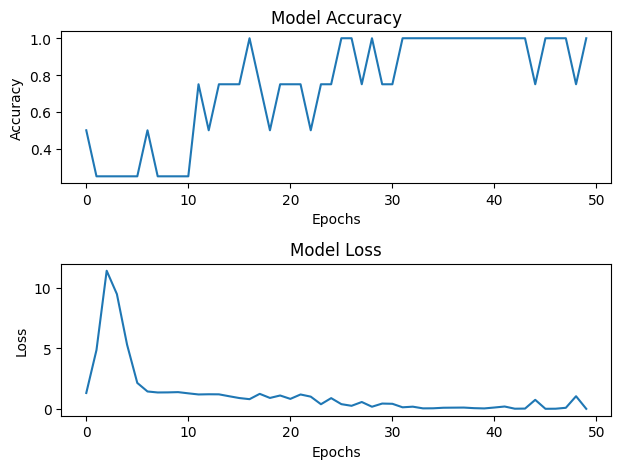

(array([[0.99772483, 0.19523065, 0.27029744, 0.49001712],
        [0.04839836, 0.02418868, 0.9999191 , 0.8384497 ],
        [0.0213066 , 0.92721945, 0.26086885, 0.9997793 ],
        [0.03715691, 0.9999756 , 0.01663567, 0.93880415]], dtype=float32),
 array(['Squirrel', 'Kangaroo', 'Lion', 'Elephant'], dtype='<U8'))

In [14]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

#print('Original Images: ', list(zip(image_array, label_array)))
image_array, label_array =  unison_shuffled_copies(image_array, label_array)

#print('Shuffeled Images: ', list(zip(image_array, label_array)))
pred_labels = model.predict(image_array)


# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1) 

# Plot on the first subplot
ax1.plot(list(range(0, 50)), history.history['accuracy'])
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_title('Model Accuracy')

# Plot on the second subplot
ax2.plot(list(range(0, 50)), history.history['loss'])
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.set_title('Model Loss')

# Adjust spacing between subplots
plt.tight_layout() 
plt.show()



pred_labels, label_array

In [15]:
def find_key_by_value(d, target_value):
    return next((key for key, value in d.items() if value == target_value), None)

 
for labels, actual_label in zip(pred_labels, label_array):
    highest_score = np.max(labels)  # Find the maximum value
    score = np.argmax(labels)       # Get the index of the maximum value
    predicted_label = find_key_by_value(animal_to_label, score)
    
    print(f'Predicted Label: \t {predicted_label} \nActual Label: \t\t {actual_label} \n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
         

Predicted Label: 	 Squirrel 
Actual Label: 		 Squirrel 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Label: 	 Kangaroo 
Actual Label: 		 Kangaroo 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Label: 	 Lion 
Actual Label: 		 Lion 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Label: 	 Elephant 
Actual Label: 		 Elephant 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
